# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('telecom_users.csv', index_col=[0])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
# Видно, что индексы не по порядку
# Упорядочим даные по индексу
data.sort_index(inplace=True)

In [3]:
# Колонка customerID явно ни как не влияет на то, ушел клиент или нет
# поэтому ее можно убрать из датасета для построения моделей
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Посомтрим на типы данных
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Проверим на пропущенные данные
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Видно, что колонка TotalCharges имеет тип объект, хотя там стоят цифры
# Изменим формат данного столбца
data['TotalCharges'] = data['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [7]:
# В столбце есть пустые значения, сначала заменим их, а затем снова переведем в формат float
data['TotalCharges'].replace(' ', 0, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# Посмотрим на статистику, кроме колонки SeniorCitizen
data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


Сильных отклонений и выбросов нет. Данные равномерны.

In [10]:
# Для более удобного способа обработки категориальных данных выберем их в отдельный список.
categorical_cols = [cname for cname in data.columns if
                    data[cname].dtype == "object"]
categorical_cols = ['SeniorCitizen'] + categorical_cols[:-1] # Добавим колонку SeniorCitizen в наш список и уберем целевую колонку
categorical_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [11]:
# Так же выберем числовые столбцы, кроме SeniorCitizen
numerical_cols = [cname for cname in data.columns if 
                data[cname].dtype in ['int64', 'float64']]
numerical_cols = numerical_cols[1:]
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
# Посомтрим, какое количество разных категорий есть в категориальных столбцах
# Это поможет отбросить колонки с большим количеством категорий для упрощения моделей
object_nunique = list(map(lambda col: data[col].nunique(), categorical_cols))
d = dict(zip(categorical_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('SeniorCitizen', 2),
 ('gender', 2),
 ('Partner', 2),
 ('Dependents', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('MultipleLines', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('OnlineBackup', 3),
 ('DeviceProtection', 3),
 ('TechSupport', 3),
 ('StreamingTV', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('PaymentMethod', 4)]

Видно, что количетсво категорий не большое, поэтому все колонки можно оставить.

In [15]:
# Выделим целевую переменную и набор фичей
features = data.drop('Churn', axis=1)
target = data['Churn']

In [16]:
# Используем для кодирования категориальных столбцов метод OrdinalEncoder из sklearn
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
features[categorical_cols] = ordinal_encoder.fit_transform(features[categorical_cols])

features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [18]:
# Так же преведем целевой столбоц в цифровой формат категорий
target = target.map({'No' : 0, 'Yes' : 1}).astype(int)
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [19]:
# Маштабируем числовые столбцы с помощью функции MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
features[numerical_cols] = mm_scaler.fit_transform(features[numerical_cols])
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.115423,0.003437
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.385075,0.217564
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.354229,0.012453
3,1.0,0.0,0.0,0.0,0.625000,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.239303,0.211951
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.521891,0.017462


##### Данные подготовлены. Можно приступать к исследованию зависимостей

# 2. Исследование зависимостей и формулирование гипотез

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Сравенние количества ушедших и оставшихся клиентов'}>

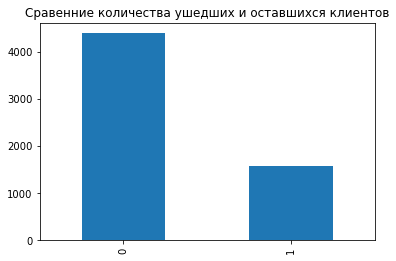

In [33]:
# Посмотрим на сбалансированость целевой переменной
# создаем диаграмму, где ось x - это признак, а Y указывает значение метки
target.value_counts().plot(kind="bar", title='Сравенние количества ушедших и оставшихся клиентов')

Количество оттока больше чем в два раза превышает количество оставшихся клиентов. Так как задача стоит в предсказании оттока, то у модели будет больше данных для прогнозирования оттока. Однако это следует брать во внимание при оценке моделей.

<AxesSubplot:title={'center':'Корреляция признаков Пирсона'}>

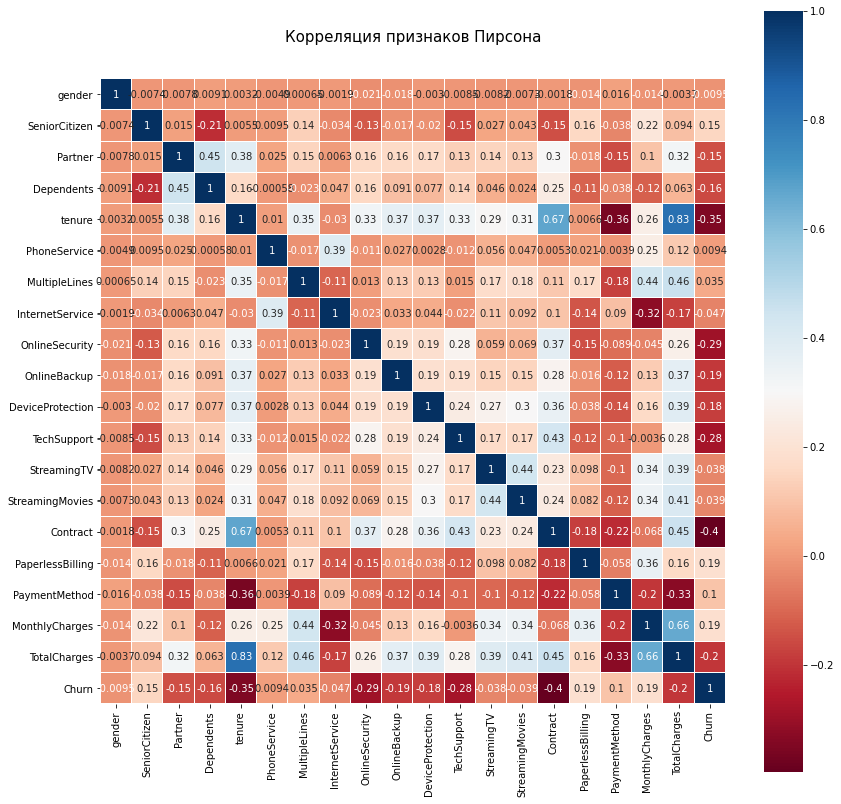

In [43]:
# Посмотрим на таблицу корреляций Пирсона
# Нам важно так же увидеть корреляцию с целевой переменной, поэтому возьмем весь датасет
all_data = pd.concat([features, target], axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
plt.title('Корреляция признаков Пирсона', y=1.05, size=15)
sns.heatmap(all_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Видно, что много фичей имеют сильную парную корреляцию. Это позволит выбрать наиболее важные из них и отбросить менее выжные для экономии рессурсов при обучении моделей.

С помощью свойства feature_importances_ в RandomForestClassifier найдем наиболее выжные фичи.

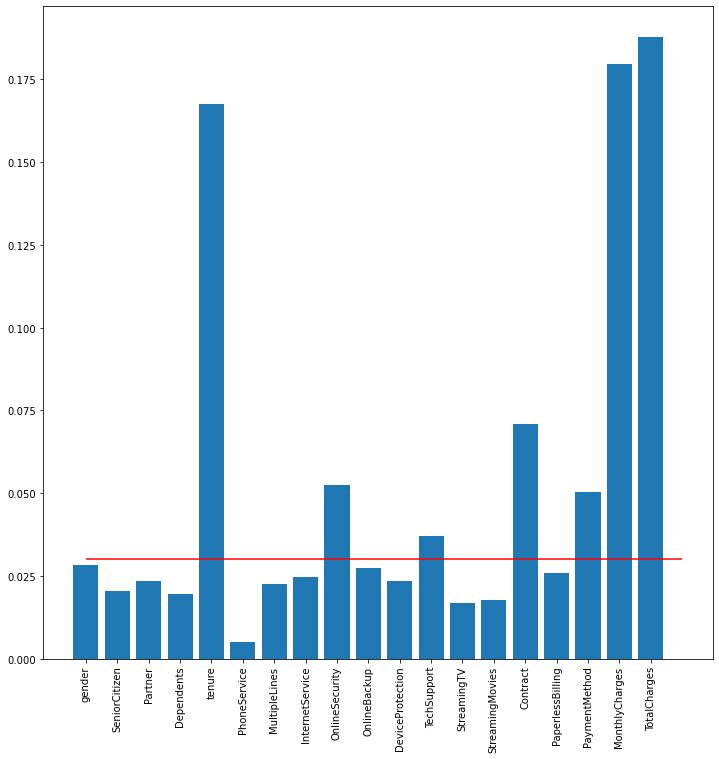

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features, target)
# построим барплот, где ось x - это функции, а Y, показывает важность каждой функции
plt.figure(figsize=(12,12))
plt.bar(features.columns, clf.feature_importances_)
plt.hlines(0.03, 0, 19, colors='red')
plt.xticks(rotation=90)
plt.show()

In [84]:
# Так применим RFE для выбора наиболее важных фич. 
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7)
X_new = rfe.fit_transform(features, target)

In [48]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True])

C:\Users\1642579\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


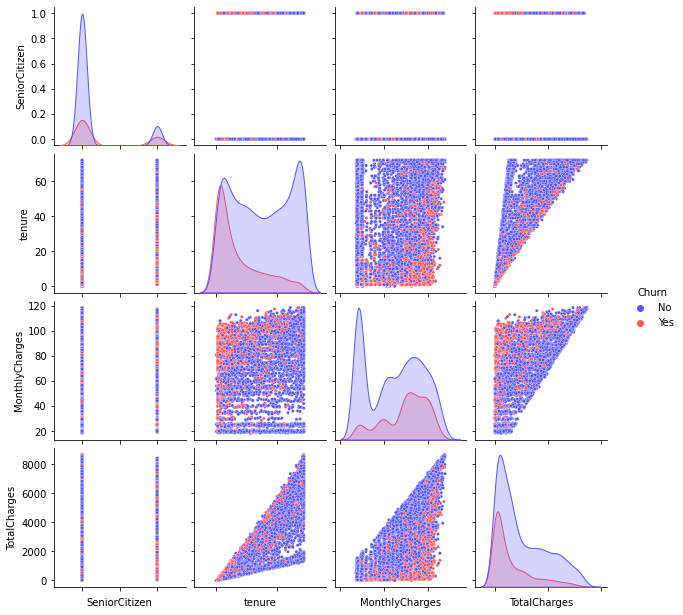

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.pairplot(data[[u'Churn', u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure', u'PhoneService', u'MultipleLines',
                       u'InternetService', u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
                      u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling', u'PaymentMethod',
                      u'MonthlyCharges', u'TotalCharges']], 
                 hue='Churn', palette = 'seismic', size=2.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

# 3. Построение моделей для прогнозирования оттока

Для задач классификации наиболее распространены следуюие модели: 

    1. Логистическая регрессия (LogisticRegression) 
    2. Случайный лес (RandomForestClassifier)
    3. Метод опорных векторов (SVM)
    4. К-ближайших соседей (KNeighborsClassifier)
    5. Модели бустинга. (Применим GradientBoostingClassifier и XGBClassifier)

Сначала посторим модели на выбраных выше фичах.

In [89]:
# Загрузка необходимых библеотек
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [110]:
# Разобъем данные на тренировочные и тестовые данные
x_train, x_test, y_train, y_test = train_test_split(X_new, target, test_size=0.3, random_state=17)

С помощью метода GridSearchCV подберем оптимальные гипермаметры для моделей.\
А с помощью StratifiedKFold установим крос-валидацию для проверки подбора параметров

In [117]:
# параметры алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 1., 0.1)}  # GradientBoostingClassifier

rfc_params = {'n_estimators': range(50, 500, 50),        # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'],               # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}                # LogisticRegression

knn_params = {'n_neighbors': np.arange(1, 30, 1),        # KNN
             'weights': ['uniform', 'distance'] }

xgb_params = {'n_estimators': range(50, 500, 50),         # XGBClassifier
              'eta': np.arange(0.1, 0.5, .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}


skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [118]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=17)
gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf)
gbc_model = gbc_grid.fit(x_train, y_train)
print(f"Лучшие параметры для GradientBoostingClassifier {gbc_model.best_params_}")

# RandomForestClassifier
rfc = RandomForestClassifier(random_state=17)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf)
rfc_model = rfc_grid.fit(x_train, y_train)
print(f"Лучшие параметры для RandomForestClassifier {rfc_model.best_params_}")

# SVC
svc = SVC(random_state=17)
svc_grid = GridSearchCV(svc, svc_params, cv=skf)
svc_model = svc_grid.fit(x_train, y_train)
print(f"Лучшие параметры для SVC {svc_model.best_params_}")

# LogisticRegression
lr = LogisticRegression(random_state=17)
lr_grid = GridSearchCV(lr, lr_params, cv=skf)
lr_model = lr_grid.fit(x_train, y_train)
print(f"Лучшие параметры для LogisticRegression {lr_model.best_params_}")

# KNN
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=skf)
knn_model = knn_grid.fit(x_train, y_train)
print(f"Лучшие параметры для KNeighborsClassifier {knn_model.best_params_}")

# XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', random_state=17)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=skf, n_jobs=4)
xgb_model = xgb_grid.fit(x_train, y_train)
print(f"Лучшие параметры для XGBClassifier {xgb_model.best_params_}")

Лучшие параметры для GradientBoostingClassifier {'learning_rate': 0.1}
Лучшие параметры для RandomForestClassifier {'min_samples_leaf': 4, 'n_estimators': 100}
Лучшие параметры для SVC {'C': 0.9000000000000001, 'kernel': 'linear'}
Лучшие параметры для LogisticRegression {'C': 0.7999999999999999}
Лучшие параметры для KNeighborsClassifier {'n_neighbors': 27, 'weights': 'uniform'}
Лучшие параметры для XGBClassifier {'eta': 0.2, 'min_child_weight': 9, 'n_estimators': 50, 'subsample': 0.1}


C:\Users\1642579\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Обучение моделей с лучшими подобранными параметрами

In [119]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gbc_model = gbc.fit(x_train,y_train)

# RandomForestClassifier
rfc = RandomForestClassifier(min_samples_leaf=4, n_estimators=100, random_state=17)
rfc_model = rfc.fit(x_train,y_train)

# SVC
svc = SVC(C= 0.9000000000000001, kernel='linear', random_state=17)
svc_model = svc.fit(x_train,y_train)

# LogisticRegression
lr = LogisticRegression(C=0.7999999999999999, random_state=17)
lr_model = lr.fit(x_train,y_train)

# KNN
knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn_model = knn.fit(x_train,y_train)

# XGBClassifier
xgb = XGBClassifier(eta=0.2, min_child_weight=9, n_estimators=50, subsample=0.1,
                    eval_metric='logloss', random_state=17)
xgb_model = xgb.fit(x_train,y_train)

C:\Users\1642579\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Теперь для обучения моделей передадим все фичи. Так же выберем наилучшие параметры, построим модели.

In [121]:
# Разобъем данные на тренировочные и тестовые данные
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(features, target, test_size=0.3, random_state=17)

In [123]:
# Подбор параметров

# GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=17)
gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf)
gbc_model = gbc_grid.fit(x_train_full, y_train_full)
print(f"Лучшие параметры для GradientBoostingClassifier {gbc_model.best_params_}")

# RandomForestClassifier
rfc = RandomForestClassifier(random_state=17)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf)
rfc_model = rfc_grid.fit(x_train_full, y_train_full)
print(f"Лучшие параметры для RandomForestClassifier {rfc_model.best_params_}")

# SVC
svc = SVC(random_state=17)
svc_grid = GridSearchCV(svc, svc_params, cv=skf)
svc_model = svc_grid.fit(x_train_full, y_train_full)
print(f"Лучшие параметры для SVC {svc_model.best_params_}")

# LogisticRegression
lr = LogisticRegression(random_state=17)
lr_grid = GridSearchCV(lr, lr_params, cv=skf)
lr_model = lr_grid.fit(x_train_full, y_train_full)
print(f"Лучшие параметры для LogisticRegression {lr_model.best_params_}")

# KNN
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=skf)
knn_model = knn_grid.fit(x_train_full, y_train_full)
print(f"Лучшие параметры для KNeighborsClassifier {knn_model.best_params_}")

# XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', random_state=17)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=skf, n_jobs=4)
xgb_model = xgb_grid.fit(x_train_full, y_train_full)
print(f"Лучшие параметры для XGBClassifier {xgb_model.best_params_}")

Лучшие параметры для GradientBoostingClassifier {'learning_rate': 0.1}
Лучшие параметры для RandomForestClassifier {'min_samples_leaf': 4, 'n_estimators': 100}
Лучшие параметры для SVC {'C': 0.1, 'kernel': 'linear'}
Лучшие параметры для LogisticRegression {'C': 0.8999999999999999}
Лучшие параметры для KNeighborsClassifier {'n_neighbors': 28, 'weights': 'uniform'}
Лучшие параметры для XGBClassifier {'eta': 0.1, 'min_child_weight': 9, 'n_estimators': 50, 'subsample': 0.5000000000000001}


In [124]:
# Обучение моделей

# GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gbc_model_full = gbc.fit(x_train_full,y_train_full)

# RandomForestClassifier
rfc = RandomForestClassifier(min_samples_leaf=4, n_estimators=100, random_state=17)
rfc_model_full = rfc.fit(x_train_full,y_train_full)

# SVC
svc = SVC(C= 0.1, kernel='linear', random_state=17)
svc_model_full = svc.fit(x_train_full,y_train_full)

# LogisticRegression
lr = LogisticRegression(C=0.8999999999999999, random_state=17)
lr_model_full = lr.fit(x_train_full,y_train_full)

# KNN
knn = KNeighborsClassifier(n_neighbors=28, weights='uniform')
knn_model_full = knn.fit(x_train_full,y_train_full)

# XGBClassifier
xgb = XGBClassifier(eta=0.1, min_child_weight=9, n_estimators=50, subsample=0.5000000000000001,
                    eval_metric='logloss', random_state=17)
xgb_model_full = xgb.fit(x_train_full,y_train_full)

# 4. Сравнение качества моделей 

In [120]:
# Качества моделей на выбраных фичах

# GradientBoostingClassifier
gbc_predict = gbc_model.predict(x_test)
score = accuracy_score(y_test, gbc_predict)
print(f"Accuracy score для GradientBoostingClassifier {score}")

# RandomForestClassifier
rfc_predict = rfc_model.predict(x_test)
score = accuracy_score(y_test, rfc_predict)
print(f"Accuracy score для RandomForestClassifier {score}")

# SVC
svc_predict = svc_model.predict(x_test)
score = accuracy_score(y_test, svc_predict)
print(f"Accuracy score для SVC {score}")

# LogisticRegression
lr_predict = lr_model.predict(x_test)
score = accuracy_score(y_test, lr_predict)
print(f"Accuracy score для LogisticRegression {score}")

# KNN
knn_predict = knn_model.predict(x_test)
score = accuracy_score(y_test, knn_predict)
print(f"Accuracy score для KNeighborsClassifier {score}")

# XGBClassifier
xgb_predict = xgb_model.predict(x_test)
score = accuracy_score(y_test, xgb_predict)
print(f"Accuracy score для XGBClassifier {score}")

Accuracy score для GradientBoostingClassifier 0.7928730512249443
Accuracy score для RandomForestClassifier 0.7912026726057907
Accuracy score для SVC 0.7912026726057907
Accuracy score для LogisticRegression 0.7956570155902004
Accuracy score для KNeighborsClassifier 0.7923162583518931
Accuracy score для XGBClassifier 0.7989977728285078


In [125]:
# Качества моделей на всех данных

# GradientBoostingClassifier
gbc_predict = gbc_model_full.predict(x_test_full)
score = accuracy_score(y_test_full, gbc_predict)
print(f"Accuracy score для GradientBoostingClassifier {score}")

# RandomForestClassifier
rfc_predict = rfc_model_full.predict(x_test_full)
score = accuracy_score(y_test_full, rfc_predict)
print(f"Accuracy score для RandomForestClassifier {score}")

# SVC
svc_predict = svc_model_full.predict(x_test_full)
score = accuracy_score(y_test_full, svc_predict)
print(f"Accuracy score для SVC {score}")

# LogisticRegression
lr_predict = lr_model_full.predict(x_test_full)
score = accuracy_score(y_test_full, lr_predict)
print(f"Accuracy score для LogisticRegression {score}")

# KNN
knn_predict = knn_model_full.predict(x_test_full)
score = accuracy_score(y_test_full, knn_predict)
print(f"Accuracy score для KNeighborsClassifier {score}")

# XGBClassifier
xgb_predict = xgb_model_full.predict(x_test_full)
score = accuracy_score(y_test_full, xgb_predict)
print(f"Accuracy score для XGBClassifier {score}")

Accuracy score для GradientBoostingClassifier 0.8090200445434298
Accuracy score для RandomForestClassifier 0.8073496659242761
Accuracy score для SVC 0.8017817371937639
Accuracy score для LogisticRegression 0.8001113585746102
Accuracy score для KNeighborsClassifier 0.7711581291759465
Accuracy score для XGBClassifier 0.8062360801781737


## Вывод

Наилучшей моделью для классификации оттока клиентов является GradientBoostingClassifier обученной на полном наборе данных.